In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc")
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/BBL_w_O_updated_diagnostics_TKE_terms.nc").isel(time=slice(0,4000)) #i=103

In [4]:
ocean_data.k

<xarray.DataArray 'k' (time: 4000, zC: 100, yC: 1, xF: 500)>
[200000000 values with dtype=float64]
Coordinates:
  * zC       (zC) float64 1.0 3.0 5.0 7.0 9.0 ... 191.0 193.0 195.0 197.0 199.0
  * xF       (xF) float64 0.0 4.0 8.0 12.0 ... 1.988e+03 1.992e+03 1.996e+03
  * yC       (yC) float64 1.0
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 04:46:31.949911923

In [5]:
# u = ocean_data.u#+ocean_data.U
# v = ocean_data.v#+ocean_data.V
# b = ocean_data.B
# # B = ocean_data.B
# w = ocean_data.w

In [6]:
KE_spatial_average_time_series = ocean_data.k.mean(dim=['xF','yC','zC'])
KE_spatial_average_time_series

<xarray.DataArray 'k' (time: 4000)>
array([9.95309422e-09, 8.87687966e-09, 7.50180062e-09, ...,
       2.45615497e-05, 2.46641113e-05, 2.47724552e-05])
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 04:46:31.949911923

In [12]:
KE_t_spatial_average_time_series = ocean_data.KE.mean(dim=['xC','yC','zC'])
KE_t_spatial_average_time_series

<xarray.DataArray 'KE' (time: 4000)>
array([9.95309422e-09, 8.87687966e-09, 7.50180062e-09, ...,
       2.45615497e-05, 2.46641113e-05, 2.47724552e-05])
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 04:46:31.949911923

In [13]:
inertial_period = KE_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi)
KE_spatial_average_time_series_ip = KE_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

In [ ]:
inertial_period.data

<xarray.DataArray 'time' (time: 4000)>
array([0.00000000e+00, 5.24404432e-03, 1.04880886e-02, ...,
       2.04675050e+01, 2.04727490e+01, 2.04779931e+01])
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 04:46:31.949911923

In [1]:
plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.values)
plt.show()

NameError: name 'plt' is not defined

In [17]:
timeKE = KE_spatial_average_time_series.time
timeKE*1e-9

<xarray.DataArray 'time' (time: 4000)>
array([      0,     314,     628, ..., 1226163, 1226477, 1226791],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 04:46:31.949911923

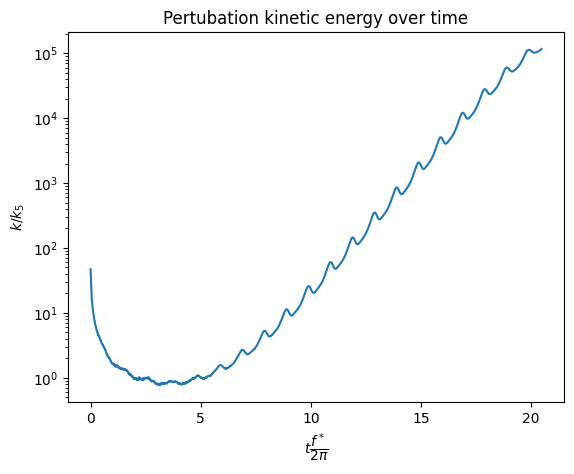

In [18]:
plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.values/KE_spatial_average_time_series_ip.values[991])
plt.title("Pertubation kinetic energy over time")
plt.ylabel('$k$/$k_5$')
plt.xlabel('$t\dfrac{f^*}{2\pi}$')
plt.yscale('log')
plt.show()

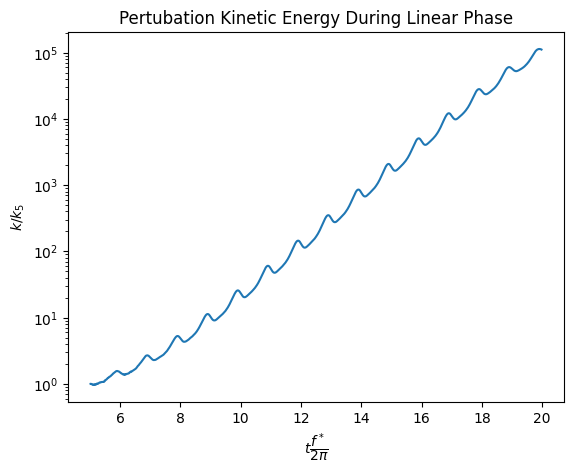

In [19]:
ts = 991
tf = 3895
plt.plot(KE_spatial_average_time_series_ip.intp[ts:tf],KE_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts])
plt.title("Pertubation Kinetic Energy During Linear Phase")
plt.ylabel('$k$/$k_5$')
plt.xlabel('$t\dfrac{f^*}{2\pi}$')
plt.yscale('log')
plt.show()

In [20]:
ocean_data

<xarray.Dataset>
Dimensions:  (zC: 100, zF: 101, xC: 500, yF: 1, xF: 500, yC: 1, time: 4000)
Coordinates:
  * zC       (zC) float64 1.0 3.0 5.0 7.0 9.0 ... 191.0 193.0 195.0 197.0 199.0
  * zF       (zF) float64 0.0 2.0 4.0 6.0 8.0 ... 192.0 194.0 196.0 198.0 200.0
  * xC       (xC) float64 2.0 6.0 10.0 14.0 ... 1.99e+03 1.994e+03 1.998e+03
  * yF       (yF) float64 1.0
  * xF       (xF) float64 0.0 4.0 8.0 12.0 ... 1.988e+03 1.992e+03 1.996e+03
  * yC       (yC) float64 1.0
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 04:46:31.949911923
Data variables:
    BFLUX    (time, zC, yC, xF) float64 ...
    AGSP     (time, zC, yC, xF) float64 ...
    PWORK    (time, zC, yC, xC) float64 ...
    KE       (time, zC, yC, xC) float64 9.09e-09 1.962e-09 ... 5.422e-07
    k        (time, zC, yC, xF) float64 1.455e-08 4.542e-09 ... 5.505e-07
    GSP      (time, zC, yF, xC) float64 ...
    E        (time, zC, yC, xC) float64 ...
Attributes:
    interval:              314.1592701438986
    Oceananigans:          This file was generated using Oceananigans v0.90.8
    Julia:                 This file was generated using Julia Version 1.9.2\...
    output time interval:  Output was saved every 5.236 minutes.
    date:                  This file was generated on 2024-06-05T11:44:29.276.
    schedule:              TimeInterval

In [21]:
AGSP_spatial_average_time_series = ocean_data.AGSP.mean(dim=['xF','yC','zC'])
inertial_period = AGSP_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
AGSP_spatial_average_time_series_ip = AGSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


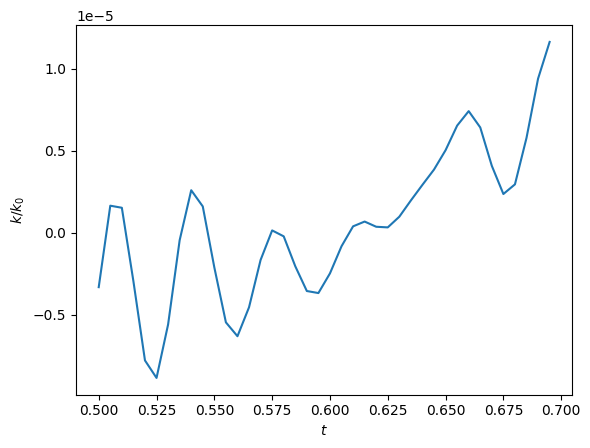

In [22]:
plt.plot(AGSP_spatial_average_time_series_ip.intp[100:140],AGSP_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [23]:
GSP_spatial_average_time_series = ocean_data.GSP.mean(dim=['xC','yF','zC'])
inertial_period = GSP_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
GSP_spatial_average_time_series_ip = GSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


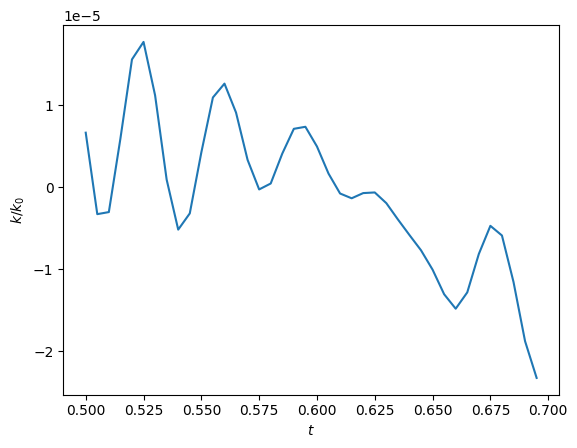

In [24]:
plt.plot(GSP_spatial_average_time_series_ip.intp[100:140],GSP_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [25]:
BFLUX_spatial_average_time_series = ocean_data.BFLUX.mean(dim=['xF','yC','zC'])
inertial_period = BFLUX_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
BFLUX_spatial_average_time_series_ip = BFLUX_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


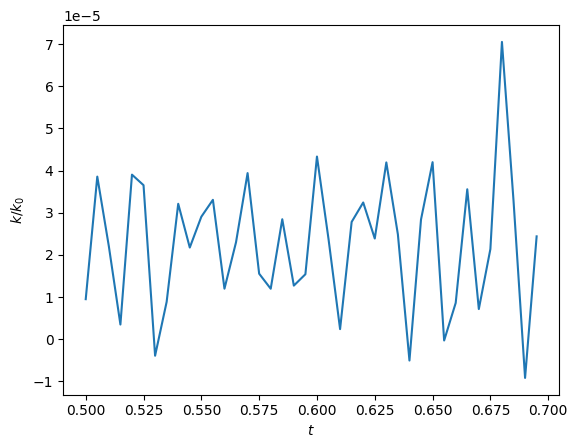

In [26]:
plt.plot(BFLUX_spatial_average_time_series_ip.intp[100:140],BFLUX_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [27]:
E_spatial_average_time_series = ocean_data.E.mean(dim=['xC','yC','zC'])
inertial_period = E_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
E_spatial_average_time_series_ip = E_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


: 

In [ ]:
plt.plot(E_spatial_average_time_series_ip.intp[100:140],-1*E_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [ ]:
PWORK_spatial_average_time_series = ocean_data.PWORK.mean(dim=['xC','yC','zC'])
inertial_period = PWORK_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
PWORK_spatial_average_time_series_ip = PWORK_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

In [ ]:
plt.plot(PWORK_spatial_average_time_series_ip.intp,1e4*PWORK_spatial_average_time_series_ip.values/KE_spatial_average_time_series_ip.values)
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [ ]:
KE_turb = ocean_data.k.mean(dim=['xF','yC','zC'])
KE_turb


In [ ]:
ts = 120
tf = 2061
KE_turb = ocean_data.k.mean(dim=['xF','yC','zC'])
seconds = KE_turb.time/pd.Timedelta("1s")
inertial_period = KE_turb.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
KE_turb_ip = KE_turb.assign_coords(intp = ('time',inertial_period.data))
KE_turb_ip = KE_turb_ip.assign_coords(sec = ('time',seconds.data))
# seconds = KE_spatial_average_time_series.time/pd.Timedelta("1s")
# inertial_period = KE_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
# KE_spatial_average_time_series_s= KE_spatial_average_time_series.assign_coords(sec = ('time',seconds.data))
# KE_spatial_average_time_series_intp = KE_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))
dkdt = KE_turb_ip.differentiate(coord='sec',edge_order=2)
# np.gradient(KE_spatial_average_time_series_ip,KE_spatial_average_time_series_ip.time)
plt.plot(inertial_period[100:140],dkdt[100:140]/KE_spatial_average_time_series_s[100:140])


In [ ]:
dkdt

In [ ]:
inertial_period[1865]

In [ ]:
dkdt

In [ ]:
AGSP_spatial_average_time_series_ip

In [ ]:
ts = 2081
tf = 2481
plt.plot(dkdt.intp[ts:tf],1e4*dkdt[ts:tf]/KE_turb_ip[ts:tf],color="k",label='$\dfrac{1}{k}\dfrac{\partial k}{\partial t}$')
plt.plot(AGSP_spatial_average_time_series_ip.intp[ts:tf],1e4*AGSP_spatial_average_time_series_ip.values[ts:tf]/KE_turb_ip.values[ts:tf],color='red',label='AGSP/k')
plt.plot(GSP_spatial_average_time_series_ip.intp[ts:tf],GSP_spatial_average_time_series_ip.values[ts:tf]/KE_turb_ip.values[ts:tf]*1e4,color='green',label='GSP/k')
plt.plot(BFLUX_spatial_average_time_series_ip.intp[ts:tf],BFLUX_spatial_average_time_series_ip.values[ts:tf]/KE_turb_ip.values[ts:tf]*1e4,color='blue',label='BFLUX/k')
# plt.plot(E_spatial_average_time_series_ip.intp[ts:tf],-1*E_spatial_average_time_series_ip.values[ts:tf]/KE_turb_ip.values[ts:tf]*1e4,color='pink',label='$-\epsilon/k$')
plt.plot(PWORK_spatial_average_time_series_ip.intp[ts:tf],1e4*PWORK_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf],color='orange')
plt.axhline(color="violet")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("TKE growth rate/f")
plt.legend(loc='lower left')
plt.figure(figsize=(12,5))
plt.show()

In [ ]:
eps_spatial_average_time_series = ocean_data.E.mean(dim=['xC','yC','zC'])

In [ ]:
plt.plot(eps_spatial_average_time_series.time[50:100]*(1e-4)/(2*np.pi),eps_spatial_average_time_series.values[50:100])
plt.show()

In [ ]:
AGSP_spatial_average_time_series_ip

In [ ]:
seconds = GSP_spatial_average_time_series_ip.time/pd.Timedelta("1s")
AGSP_spatial_average_time_series_ip = AGSP_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_AGSP = (AGSP_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_AGSP.intp,integrated_AGSP)
plt.title("Time Integrated AGSP")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
seconds = GSP_spatial_average_time_series_ip.time/pd.Timedelta("1s")
GSP_spatial_average_time_series_ip = GSP_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_GSP = (GSP_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_GSP.intp,integrated_GSP)
plt.title("Time Integrated GSP")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
seconds = BFLUX_spatial_average_time_series_ip.time/pd.Timedelta("1s")
BFLUX_spatial_average_time_series_ip = BFLUX_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_BFLUX = (BFLUX_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_BFLUX.intp,integrated_BFLUX)
plt.title("Time Integrated BFLUX")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
seconds = E_spatial_average_time_series_ip.time/pd.Timedelta("1s")
E_spatial_average_time_series_ip = E_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_E = (-1*E_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_E.intp,integrated_E)
plt.title("Time Integrated E")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
seconds = PWORK_spatial_average_time_series_ip.time/pd.Timedelta("1s")
PWORK_spatial_average_time_series_ip = PWORK_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_PWORK = (PWORK_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
integrated_PWORK

In [ ]:
PWORK_spatial_average_time_series_ip.sec.diff(dim='sec')

In [ ]:
seconds = PWORK_spatial_average_time_series_ip.time/pd.Timedelta("1s")
PWORK_spatial_average_time_series_ip = PWORK_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_PWORK = (PWORK_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_PWORK.time,integrated_PWORK)
plt.title("Time Integrated PWORK")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
plt.plot(KE_turb_ip.intp,KE_turb_ip)
plt.title("Time Integrated E")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
ts = 0
tf = -1
plt.plot(KE_turb_ip.intp[ts:tf],KE_turb_ip[ts:tf],label="$k$",color="k")
plt.plot(integrated_AGSP.intp[ts:tf],integrated_AGSP[ts:tf],label="$\int_0^tAGSP\,dt'$",color="red")
plt.plot(integrated_GSP.intp[ts:tf],integrated_GSP[ts:tf],label="$\int_0^tGSP\,dt'$",color="green")
plt.plot(integrated_BFLUX.intp[ts:tf],integrated_BFLUX[ts:tf],label="$\int_0^tBFLUX\,dt'$",color="blue")
# plt.plot(integrated_E.intp[ts:tf],integrated_E[ts:tf],label="$-\int_0^t\epsilon\,dt'$",color="pink")
plt.axhline(color="violet")
# plt.yscale("log")
plt.xlim(left=0)
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
plt.legend()
plt.show()

In [ ]:
dkdt

In [ ]:
dkdt

In [ ]:
integrated_KE = (dkdt).cumulative_integrate(coord="intp")
plt.plot(integrated_KE.intp,integrated_KE)
plt.title("Time Integrated dkdt")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
KE_check = ocean_data.k.mean(dim=['xF','yC','zC'])
inertial_period = KE_check.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
KE_check_ip = KE_check.assign_coords(intp = ('time',inertial_period.data))
plt.plot(KE_check_ip.intp[0:250],KE_check_ip[0:250])
plt.title("Time Integrated dkdt")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
da = xr.DataArray(
    np.arange(12).reshape(4, 3),
    dims=["x", "y"],
    coords={"x": [0, 0.1, 1.1, 1.2]},
)
da
da.integrate("x")

In [ ]:
da.cumulative_integrate("x")

In [ ]:
(da*da.x.diff(dim='x')).cumsum("x")*0.5